In [180]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [181]:
import numpy as np
import scipy as sp
import sklearn as sk
import cartopy as cp
import xarray as xr
import pandas as pd
import cftime
import dateutil
import dask
#Use the 2 lines below if the notebook has a dark theme (to make labelling visible):
from jupyterthemes import jtplot
jtplot.style(theme='chesterish', context='notebook', ticks=True, grid=False)
import matplotlib.pyplot as plt
#The following code resets the default plot size so you don't have to fiddle with figsize every time"
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

In [182]:
#Need the following line to avoid hdf5 issues that prevent opening thee file
# https://stackoverflow.com/questions/49317927/errno-101-netcdf-hdf-error-when-opening-netcdf-file
%env HDF5_USE_FILE_LOCKING=FALSE

env: HDF5_USE_FILE_LOCKING=FALSE


In [183]:
#Load AIRI data 
from netCDF4 import Dataset
from datetime import datetime, timedelta
from netCDF4 import num2date, date2num
dataset_file = "pALLIN.nc"
airi_dat = xr.open_dataset(dataset_file, decode_times=False)
units, reference_date = airi_dat.time.attrs['units'].split('since')
airi_dat['time'] = pd.date_range(start=reference_date, periods=airi_dat.sizes['time'], freq='MS')
#This file's calendar isn't recognized when using xr.open_dataset. The above workaround is from: 
#https://stackoverflow.com/questions/55648630/how-to-decode-the-time-variable-while-using-xarray-to-load-a-netcdf-file
# "M" means "month end frequency" (see https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)

In [184]:
airi_dat

<xarray.Dataset>
Dimensions:  (time: 1752)
Coordinates:
  * time     (time) datetime64[ns] 1871-02-01 1871-03-01 ... 2017-01-01
Data variables:
    precip   (time) float32 ...
Attributes:
    title:        
    description:  All-India Rainfall
    scripturl01:  https://climexp.knmi.nl/getindices.cgi?STATION=All-India_Ra...
    comment:      
    institution:  KNMI Climate Explorer
    scripturl02:  https://climexp.knmi.nl/dat2nc.cgi?id=$id&station=All-India...
    history:       2020-04-02  2:43:20 bin/dat2nc data/pALLIN.dat p All-India...
    Conventions:  CF-1.0

In [185]:
precip = airi_dat['precip']

In [186]:
#Load SST data
dataset_url = "https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc"
sst_dat = xr.open_dataset(dataset_url)
sst = sst_dat['sst']

In [187]:
#Slice SST data to the same duration as precip and calculate monthly anomalies
sst_subset = sst.sel(time=slice('1871-01-30','2017-01-01'))
sst_clim = sst_subset.groupby('time.month').mean('time')
sst_anomfull = sst_subset.groupby("time.month")-sst_clim
sst_anomfull

/global/home/users/medhap02/.conda/envs/xarrayenv2/lib/python3.7/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.DataArray 'sst' (time: 1752, lat: 89, lon: 180)>
array([[[1.788139e-06, 1.788139e-06, ..., 1.788139e-06, 1.788139e-06],
        [1.788139e-06, 1.788139e-06, ..., 1.788139e-06, 1.788139e-06],
        ...,
        [         nan,          nan, ...,          nan,          nan],
        [         nan,          nan, ...,          nan,          nan]],

       [[1.788139e-06, 1.788139e-06, ..., 1.788139e-06, 1.788139e-06],
        [1.788139e-06, 1.788139e-06, ..., 1.788139e-06, 1.788139e-06],
        ...,
        [         nan,          nan, ...,          nan,          nan],
        [         nan,          nan, ...,          nan,          nan]],

       ...,

       [[3.152323e-02, 2.609873e-02, ..., 2.140296e-02, 3.102016e-02],
        [2.697122e-02, 1.542413e-02, ..., 1.046002e-02, 2.427316e-02],
        ...,
        [         nan,          nan, ...,          nan,          nan],
        [         nan,          nan, ...,          nan,          nan]],

       [[1.788139e-06, 1.788139e-

In [188]:
sst_subset1 = sst_anomfull.sel(time=slice('1900-01-01','1901-12-31'))
sst_subset2 = sst_anomfull.sel(time=slice('1903-01-01','1906-12-31'))
sst_subset3 = sst_anomfull.sel(time=slice('1908-01-01','1911-12-31'))
sst_subset4 = sst_anomfull.sel(time=slice('1913-01-01','1913-12-31'))
sst_subset5 = sst_anomfull.sel(time=slice('1915-01-01','1918-12-31'))
sst_subset6 = sst_anomfull.sel(time=slice('1920-01-01','1921-12-31'))
sst_subset7 = sst_anomfull.sel(time=slice('1923-01-01','1927-12-31'))
sst_subset8 = sst_anomfull.sel(time=slice('1929-01-01','1931-12-31'))
sst_subset9 = sst_anomfull.sel(time=slice('1934-01-01','1939-12-31'))
sst_subset10 = sst_anomfull.sel(time=slice('1941-01-01','1948-12-31'))
sst_subset11 = sst_anomfull.sel(time=slice('1951-01-01','1955-12-31'))
sst_subset12 = sst_anomfull.sel(time=slice('1957-01-01','1958-12-31'))
sst_subset13 = sst_anomfull.sel(time=slice('1960-01-01','1962-12-31'))
sst_subset13 = sst_anomfull.sel(time=slice('1964-01-01','1965-12-31'))
sst_subset14 = sst_anomfull.sel(time=slice('1967-01-01','1971-12-31'))
sst_subset15 = sst_anomfull.sel(time=slice('1973-01-01','1976-12-31'))
sst_subset16 = sst_anomfull.sel(time=slice('1978-01-01','1979-12-31'))
sst_subset17 = sst_anomfull.sel(time=slice('1981-01-01','1982-12-31'))
sst_subset18 = sst_anomfull.sel(time=slice('1984-01-01','1991-12-31'))
sst_subset19 = sst_anomfull.sel(time=slice('1993-01-01','1998-12-31'))
sst_subset20 = sst_anomfull.sel(time=slice('2000-01-01','2002-12-31'))
sst_subset21 = sst_anomfull.sel(time=slice('2004-01-01','2006-12-31'))
sst_subset22 = sst_anomfull.sel(time=slice('2008-01-01','2010-12-31'))
sst_subset23 = sst_anomfull.sel(time=slice('2012-01-01','2015-12-31'))

sst_anomtemp = xr.merge([sst_subset1, sst_subset2, sst_subset3, sst_subset4, sst_subset5, 
                   sst_subset6, sst_subset7, sst_subset8, sst_subset9, sst_subset10, 
                   sst_subset11, sst_subset12, sst_subset13, sst_subset14, sst_subset15, 
                   sst_subset16, sst_subset17, sst_subset18, sst_subset19, sst_subset20, 
                   sst_subset21, sst_subset22, sst_subset23])
#sst_anom = xr.Dataset.to_array(sst_anomtemp).drop('variable')
print(sst_anomtemp)
sst_anom = sst_anomtemp['sst']
#1902, 1907, 1912, 1914, 1919, 1922, 1928, 1932, 1933, 1940
#1949, 1950, 1956, 1959, 1963, 1966, 1972, 1977, 1980, 1983
#1992, 1999, 2003, 2007, 2011

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 1056)
Coordinates:
  * time     (time) datetime64[ns] 1900-01-01 1900-02-01 ... 2015-12-01
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
    month    (time) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 8.0 9.0 10.0 11.0 12.0
Data variables:
    sst      (time, lat, lon) float32 1.7881393e-06 1.7881393e-06 ... nan nan


In [189]:
#Load SLP data
dataset_url = "/global/scratch/medhap02/ISMData/prmsl.mon.mean.nc"
slp_dat = xr.open_dataset(dataset_url)
slp = slp_dat['prmsl']

In [190]:
#Slice SLP data to the same duration as precip and calculate monthly anomalies
slp_subset = slp.sel(time=slice('1871-01-01','2015-12-31'))
slp_clim = slp_subset.groupby('time.month').mean('time')
slp_anomfull = slp_subset.groupby("time.month")-slp_clim
slp_anomfull

<xarray.DataArray 'prmsl' (time: 1740, lat: 181, lon: 360)>
array([[[  114.765625,   114.765625, ...,   114.765625,   114.765625],
        [   94.78125 ,    94.46875 , ...,    95.359375,    95.03125 ],
        ...,
        [  293.65625 ,   293.95312 , ...,   293.20312 ,   293.4297  ],
        [  288.66406 ,   288.66406 , ...,   288.66406 ,   288.66406 ]],

       [[   75.84375 ,    75.84375 , ...,    75.84375 ,    75.84375 ],
        [   67.66406 ,    68.02344 , ...,    66.85156 ,    67.24219 ],
        ...,
        [  587.2969  ,   587.52344 , ...,   586.9219  ,   587.0781  ],
        [  581.14844 ,   581.14844 , ...,   581.14844 ,   581.14844 ]],

       ...,

       [[ -876.5703  ,  -876.5703  , ...,  -876.5703  ,  -876.5703  ],
        [ -937.10156 ,  -936.8594  , ...,  -937.625   ,  -937.3906  ],
        ...,
        [-1008.4375  , -1008.8906  , ..., -1007.5625  , -1007.9922  ],
        [-1047.0938  , -1047.0938  , ..., -1047.0938  , -1047.0938  ]],

       [[ -525.5     ,  -525.5

In [191]:
slp_subset1 = slp_anomfull.sel(time=slice('1900-01-01','1901-12-31'))
slp_subset2 = slp_anomfull.sel(time=slice('1903-01-01','1906-12-31'))
slp_subset3 = slp_anomfull.sel(time=slice('1908-01-01','1911-12-31'))
slp_subset4 = slp_anomfull.sel(time=slice('1913-01-01','1913-12-31'))
slp_subset5 = slp_anomfull.sel(time=slice('1915-01-01','1918-12-31'))
slp_subset6 = slp_anomfull.sel(time=slice('1920-01-01','1921-12-31'))
slp_subset7 = slp_anomfull.sel(time=slice('1923-01-01','1927-12-31'))
slp_subset8 = slp_anomfull.sel(time=slice('1929-01-01','1931-12-31'))
slp_subset9 = slp_anomfull.sel(time=slice('1934-01-01','1939-12-31'))
slp_subset10 = slp_anomfull.sel(time=slice('1941-01-01','1948-12-31'))
slp_subset11 = slp_anomfull.sel(time=slice('1951-01-01','1955-12-31'))
slp_subset12 = slp_anomfull.sel(time=slice('1957-01-01','1958-12-31'))
slp_subset13 = slp_anomfull.sel(time=slice('1960-01-01','1962-12-31'))
slp_subset13 = slp_anomfull.sel(time=slice('1964-01-01','1965-12-31'))
slp_subset14 = slp_anomfull.sel(time=slice('1967-01-01','1971-12-31'))
slp_subset15 = slp_anomfull.sel(time=slice('1973-01-01','1976-12-31'))
slp_subset16 = slp_anomfull.sel(time=slice('1978-01-01','1979-12-31'))
slp_subset17 = slp_anomfull.sel(time=slice('1981-01-01','1982-12-31'))
slp_subset18 = slp_anomfull.sel(time=slice('1984-01-01','1991-12-31'))
slp_subset19 = slp_anomfull.sel(time=slice('1993-01-01','1998-12-31'))
slp_subset20 = slp_anomfull.sel(time=slice('2000-01-01','2002-12-31'))
slp_subset21 = slp_anomfull.sel(time=slice('2004-01-01','2006-12-31'))
slp_subset22 = slp_anomfull.sel(time=slice('2008-01-01','2010-12-31'))
slp_subset23 = slp_anomfull.sel(time=slice('2012-01-01','2015-12-31'))

slp_anomtemp = xr.merge([slp_subset1, slp_subset2, slp_subset3, slp_subset4, slp_subset5, 
                   slp_subset6, slp_subset7, slp_subset8, slp_subset9, slp_subset10, 
                   slp_subset11, slp_subset12, slp_subset13, slp_subset14, slp_subset15, 
                   slp_subset16, slp_subset17, slp_subset18, slp_subset19, slp_subset20, 
                   slp_subset21, slp_subset22, slp_subset23])
#slp_anom = xr.Dataset.to_array(slp_anomtemp).drop('variable')
print(slp_anomtemp)
slp_anom = slp_anomtemp['prmsl']
#1902, 1907, 1912, 1914, 1919, 1922, 1928, 1932, 1933, 1940
#1949, 1950, 1956, 1959, 1963, 1966, 1972, 1977, 1980, 1983
#1992, 1999, 2003, 2007, 2011

<xarray.Dataset>
Dimensions:  (lat: 181, lon: 360, time: 1056)
Coordinates:
  * time     (time) datetime64[ns] 1900-01-01 1900-02-01 ... 2015-12-01
  * lat      (lat) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
    month    (time) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 8.0 9.0 10.0 11.0 12.0
Data variables:
    prmsl    (time, lat, lon) float32 24.570312 24.570312 ... -411.48438


In [192]:
#Load MSE data
dataset_url = "MSE_20thcentury.nc"
mse_dat1 = xr.open_dataset('/global/scratch/medhap02/ISMData/MSE_20thcentury.nc')
mse_dat = mse_dat1.rename({'LON':'lon', 'LAT':'lat','TIME':'time'})
mse = mse_dat['MSE']
print(mse_dat)

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 181, lon: 360, time: 2160)
Coordinates:
  * lon        (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat        (lat) float64 -90.0 -89.0 -88.0 -87.0 ... 87.0 88.0 89.0 90.0
  * time       (time) datetime64[ns] 1836-01-01 1836-02-01 ... 2015-12-01
Dimensions without coordinates: bnds
Data variables:
    TIME_bnds  (time, bnds) datetime64[ns] ...
    MSE        (time, lat, lon) float64 ...
    DMSEDT     (time, lat, lon) float64 ...
Attributes:
    history:      PyFerret V7.43 (optimized) 14-May-20
    Conventions:  CF-1.6


In [193]:
#Slice MSE data to the same duration as precip and calculate monthly anomalies
mse_subset = mse.sel(time=slice('1871-01-30','2017-01-01'))
mse_clim = mse_subset.groupby('time.month').mean('time')
mse_anomfull = mse_subset.groupby("time.month")-mse_clim
mse_anomfull

<xarray.DataArray 'MSE' (time: 1739, lat: 181, lon: 360)>
array([[[ -437.976186,  -437.976186, ...,  -437.976186,  -437.976186],
        [ -357.903304,  -357.881208, ...,  -348.426553,  -351.846723],
        ...,
        [-4136.464814, -4142.140899, ..., -4125.058225, -4129.258011],
        [-3946.385781, -3946.385781, ..., -3946.385781, -3946.385781]],

       [[ -685.706864,  -685.706864, ...,  -685.706864,  -685.706864],
        [ -523.262003,  -522.176401, ...,  -528.206152,  -525.088336],
        ...,
        [-2774.219152, -2771.776149, ..., -2769.221152, -2770.293549],
        [-2662.830975, -2662.830975, ..., -2662.830975, -2662.830975]],

       ...,

       [[ 2257.7285  ,  2257.7285  , ...,  2257.7285  ,  2257.7285  ],
        [ 2691.46434 ,  2695.995047, ...,  2682.928563,  2688.836707],
        ...,
        [ 3071.988646,  3092.121979, ...,  3027.33813 ,  3049.99822 ],
        [ 3156.791382,  3156.791382, ...,  3156.791382,  3156.791382]],

       [[  864.856915,   864.856

In [194]:
mse_subset1 = mse_anomfull.sel(time=slice('1900-01-01','1901-12-31'))
mse_subset2 = mse_anomfull.sel(time=slice('1903-01-01','1906-12-31'))
mse_subset3 = mse_anomfull.sel(time=slice('1908-01-01','1911-12-31'))
mse_subset4 = mse_anomfull.sel(time=slice('1913-01-01','1913-12-31'))
mse_subset5 = mse_anomfull.sel(time=slice('1915-01-01','1918-12-31'))
mse_subset6 = mse_anomfull.sel(time=slice('1920-01-01','1921-12-31'))
mse_subset7 = mse_anomfull.sel(time=slice('1923-01-01','1927-12-31'))
mse_subset8 = mse_anomfull.sel(time=slice('1929-01-01','1931-12-31'))
mse_subset9 = mse_anomfull.sel(time=slice('1934-01-01','1939-12-31'))
mse_subset10 = mse_anomfull.sel(time=slice('1941-01-01','1948-12-31'))
mse_subset11 = mse_anomfull.sel(time=slice('1951-01-01','1955-12-31'))
mse_subset12 = mse_anomfull.sel(time=slice('1957-01-01','1958-12-31'))
mse_subset13 = mse_anomfull.sel(time=slice('1960-01-01','1962-12-31'))
mse_subset13 = mse_anomfull.sel(time=slice('1964-01-01','1965-12-31'))
mse_subset14 = mse_anomfull.sel(time=slice('1967-01-01','1971-12-31'))
mse_subset15 = mse_anomfull.sel(time=slice('1973-01-01','1976-12-31'))
mse_subset16 = mse_anomfull.sel(time=slice('1978-01-01','1979-12-31'))
mse_subset17 = mse_anomfull.sel(time=slice('1981-01-01','1982-12-31'))
mse_subset18 = mse_anomfull.sel(time=slice('1984-01-01','1991-12-31'))
mse_subset19 = mse_anomfull.sel(time=slice('1993-01-01','1998-12-31'))
mse_subset20 = mse_anomfull.sel(time=slice('2000-01-01','2002-12-31'))
mse_subset21 = mse_anomfull.sel(time=slice('2004-01-01','2006-12-31'))
mse_subset22 = mse_anomfull.sel(time=slice('2008-01-01','2010-12-31'))
mse_subset23 = mse_anomfull.sel(time=slice('2012-01-01','2015-12-31'))

mse_anomtemp = xr.merge([mse_subset1, mse_subset2, mse_subset3, mse_subset4, mse_subset5, 
                   mse_subset6, mse_subset7, mse_subset8, mse_subset9, mse_subset10, 
                   mse_subset11, mse_subset12, mse_subset13, mse_subset14, mse_subset15, 
                   mse_subset16, mse_subset17, mse_subset18, mse_subset19, mse_subset20, 
                   mse_subset21, mse_subset22, mse_subset23])
#mse_anom = xr.Dataset.to_array(mse_anomtemp).drop('variable')
print(mse_anomtemp)
mse_anom = mse_anomtemp['MSE']
#1902, 1907, 1912, 1914, 1919, 1922, 1928, 1932, 1933, 1940
#1949, 1950, 1956, 1959, 1963, 1966, 1972, 1977, 1980, 1983
#1992, 1999, 2003, 2007, 2011

<xarray.Dataset>
Dimensions:  (lat: 181, lon: 360, time: 1056)
Coordinates:
  * time     (time) datetime64[ns] 1900-01-01 1900-02-01 ... 2015-12-01
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
    month    (time) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 8.0 9.0 10.0 11.0 12.0
Data variables:
    MSE      (time, lat, lon) float64 -436.0 -436.0 ... 1.634e+03 1.634e+03


In [195]:
#Get precip anomalies
precip_clim = precip.groupby("time.month").mean("time")
precip_anomfull = precip.groupby("time.month") - precip_clim

In [196]:
precip_subset1 = precip_anomfull.sel(time=slice('1900-01-01','1901-12-31'))
precip_subset2 = precip_anomfull.sel(time=slice('1903-01-01','1906-12-31'))
precip_subset3 = precip_anomfull.sel(time=slice('1908-01-01','1911-12-31'))
precip_subset4 = precip_anomfull.sel(time=slice('1913-01-01','1913-12-31'))
precip_subset5 = precip_anomfull.sel(time=slice('1915-01-01','1918-12-31'))
precip_subset6 = precip_anomfull.sel(time=slice('1920-01-01','1921-12-31'))
precip_subset7 = precip_anomfull.sel(time=slice('1923-01-01','1927-12-31'))
precip_subset8 = precip_anomfull.sel(time=slice('1929-01-01','1931-12-31'))
precip_subset9 = precip_anomfull.sel(time=slice('1934-01-01','1939-12-31'))
precip_subset10 = precip_anomfull.sel(time=slice('1941-01-01','1948-12-31'))
precip_subset11 = precip_anomfull.sel(time=slice('1951-01-01','1955-12-31'))
precip_subset12 = precip_anomfull.sel(time=slice('1957-01-01','1958-12-31'))
precip_subset13 = precip_anomfull.sel(time=slice('1960-01-01','1962-12-31'))
precip_subset13 = precip_anomfull.sel(time=slice('1964-01-01','1965-12-31'))
precip_subset14 = precip_anomfull.sel(time=slice('1967-01-01','1971-12-31'))
precip_subset15 = precip_anomfull.sel(time=slice('1973-01-01','1976-12-31'))
precip_subset16 = precip_anomfull.sel(time=slice('1978-01-01','1979-12-31'))
precip_subset17 = precip_anomfull.sel(time=slice('1981-01-01','1982-12-31'))
precip_subset18 = precip_anomfull.sel(time=slice('1984-01-01','1991-12-31'))
precip_subset19 = precip_anomfull.sel(time=slice('1993-01-01','1998-12-31'))
precip_subset20 = precip_anomfull.sel(time=slice('2000-01-01','2002-12-31'))
precip_subset21 = precip_anomfull.sel(time=slice('2004-01-01','2006-12-31'))
precip_subset22 = precip_anomfull.sel(time=slice('2008-01-01','2010-12-31'))
precip_subset23 = precip_anomfull.sel(time=slice('2012-01-01','2015-12-31'))

precip_anom = xr.merge([precip_subset1, precip_subset2, precip_subset3, precip_subset4, precip_subset5, 
                   precip_subset6, precip_subset7, precip_subset8, precip_subset9, precip_subset10, 
                   precip_subset11, precip_subset12, precip_subset13, precip_subset14, precip_subset15, 
                   precip_subset16, precip_subset17, precip_subset18, precip_subset19, precip_subset20, 
                   precip_subset21, precip_subset22, precip_subset23])
precip_anomtemp = xr.Dataset.to_array(precip_anom)
precip_anom = precip_anom['precip']
print(precip_anom)
#1902, 1907, 1912, 1914, 1919, 1922, 1928, 1932, 1933, 1940
#1949, 1950, 1956, 1959, 1963, 1966, 1972, 1977, 1980, 1983
#1992, 1999, 2003, 2007, 2011

<xarray.DataArray 'precip' (time: 1056)>
array([ -9.166439,   4.535616,  -5.745206, ..., -44.439735, -40.930824,
        13.444523], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1900-01-01 1900-02-01 ... 2015-12-01
    month    (time) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 8.0 9.0 10.0 11.0 12.0


In [197]:
junes = np.arange(5,1056,12)
julys = np.arange(6,1056,12) #1752 instead of 1068
augusts = np.arange(7,1056, 12)
septembers = np.arange(8,1056,12)
precipa_june = precip_anom[junes]
precipa_july = precip_anom[julys]
precipa_august = precip_anom[augusts]
precipa_september = precip_anom[septembers]

precipa_july.time.data = precipa_june.time.data
precipa_august.time.data = precipa_june.time.data
precipa_september.time.data = precipa_june.time.data

precipa_jjas = (precipa_june + precipa_july + precipa_august + precipa_september)

In [198]:
def covariance(x, y, dims=None):
    return xr.dot(x - x.mean(dims), y - y.mean(dims), dims=dims) / x.count(dims)

def correlation(x, y, dims=None):
    return covariance(x, y, dims) / (x.std(dims) * y.std(dims))

# EPT

In [199]:
#EPT original

#DSST1
latrange1 = sst_anom.sel(lat = slice(5, -20)).lat
weights1 = np.cos(latrange1*np.pi/180)

marchdata1 = sst_anom.sel(lat = slice(5, -20), lon = slice(150, 170), time = (sst_anom['time.month']==3))
marchSST1 = marchdata1.sel(time = slice('1900-03-01', '2015-03-01'))
marchmean1 = (marchSST1*weights1).mean({'lon', 'lat'})/weights1.mean() 

aprildata1 = sst_anom.sel(lat = slice(5, -20), lon = slice(150, 170), time = (sst_anom['time.month']==4))
aprilSST1 = aprildata1.sel(time = slice('1900-04-01', '2015-04-01'))
aprilmean1 = (aprilSST1*weights1).mean({'lon', 'lat'})/weights1.mean() 

maydata1 = sst_anom.sel(lat = slice(5, -20), lon = slice(150, 170), time = (sst_anom['time.month']==5))
maySST1 = maydata1.sel(time = slice('1900-05-01', '2015-05-01'))
maymean1 = (maySST1*weights1).mean({'lon', 'lat'})/weights1.mean()

marchmean1.time.data = maymean1.time.data
aprilmean1.time.data = maymean1.time.data
DSST1mean = (maymean1 + aprilmean1 + marchmean1)/3

#DSST2
latrange2 = sst_anom.sel(lat = slice(10, -10)).lat
weights2 = np.cos(latrange2*np.pi/180)

marchdata2 = sst_anom.sel(lat = slice(10, -10), lon = slice(250, 280), time = (sst_anom['time.month']==3))
marchSST2 = marchdata2.sel(time = slice('1900-03-01', '2015-03-01'))
marchmean2 = (marchSST2*weights2).mean({'lon', 'lat'})/weights2.mean()

aprildata2 = sst_anom.sel(lat = slice(10, -10), lon = slice(250, 280), time = (sst_anom['time.month']==4))
aprilSST2 = aprildata2.sel(time = slice('1900-04-01', '2015-04-01'))
aprilmean2 = (aprilSST2*weights2).mean({'lon', 'lat'})/weights2.mean() 

maydata2 = sst_anom.sel(lat = slice(10, -10), lon = slice(250, 280), time = (sst_anom['time.month']==5))
maySST2 = maydata2.sel(time = slice('1900-05-01', '2015-05-01'))
maymean2 = (maySST2*weights2).mean({'lon', 'lat'})/weights2.mean()

marchmean2.time.data = maymean2.time.data
aprilmean2.time.data = maymean2.time.data
DSST2mean = (maymean2 + aprilmean2 + marchmean2)/3

EPToriginalmean = DSST1mean - DSST2mean
#print(EPToriginalmean)
EPTstd = EPToriginalmean.std()
EPTmean = EPToriginalmean.mean()
EPToriginalmean = (EPToriginalmean - EPTmean)/EPTstd
print(EPToriginalmean)

<xarray.DataArray (time: 88)>
array([-1.001022e+00,  4.092521e-01, -8.242461e-02, -3.950637e-01,
       -1.991887e+00, -5.299378e-01,  1.560524e+00,  9.171774e-01,
        1.861798e+00,  7.184782e-01,  5.132719e-01, -1.393943e+00,
        6.510655e-01, -8.583212e-01, -1.542083e+00, -5.391475e-01,
        7.739933e-01, -1.586646e-01,  2.022947e+00, -1.050585e+00,
       -9.153548e-01, -3.219801e-01, -3.372386e-01, -2.678311e-01,
       -1.133814e+00, -3.801206e-01,  2.781658e-01, -1.719525e-01,
       -6.795717e-01,  1.400972e+00, -8.641061e-01, -2.277115e+00,
        3.372310e-01,  6.574911e-01,  1.270842e-02,  3.108336e-01,
        1.808633e+00,  6.328033e-01, -1.012164e+00, -1.072956e-01,
       -6.848660e-01, -1.839094e+00,  1.232946e+00,  4.221162e-01,
       -1.384519e+00, -1.189353e+00,  1.413989e+00, -1.641494e+00,
        4.898613e-01,  1.438546e+00, -1.031586e+00,  9.106532e-01,
        8.513597e-01,  5.350164e-01,  3.352629e-01,  4.771452e-01,
       -1.099682e-02,  7.402413e

In [200]:
DSST1 = (maymean1 - marchmean1)
DSST2 = (maymean2 - marchmean2)

EPToriginal = DSST1 - DSST2
#print(EPToriginal)
EPTstd = EPToriginal.std()
EPTmean = EPToriginal.mean()
EPToriginal = (EPToriginal - EPTmean)/EPTstd
print(EPToriginal)

<xarray.DataArray (time: 88)>
array([-0.087031, -0.349395,  0.952161, -2.207361, -1.112206,  2.42138 ,
        1.067863, -0.055572,  0.374956, -1.817191,  0.379771, -0.832366,
        0.601817, -0.670612, -0.832157,  1.29451 , -0.546239, -0.765166,
        0.272546,  0.120034,  0.200123, -0.150773, -0.787937, -0.841457,
        1.517263,  0.159261, -1.528789, -0.047607,  0.57149 ,  0.927541,
       -1.434518, -0.188932,  2.12384 , -0.464264,  0.123852, -0.708544,
       -0.061771,  1.765358,  2.167504, -0.49596 ,  1.277148, -0.428457,
        1.862247,  0.526277, -1.026932, -0.470538,  2.056401, -1.692724,
       -0.349625, -0.254107, -0.779232,  0.113341, -0.013173,  1.063192,
       -0.792651,  0.983634, -0.862947,  0.71936 , -1.147233,  0.432044,
       -0.780704,  0.746544,  0.637105,  0.563633, -0.09354 ,  0.789095,
        0.220932, -0.381595, -0.322652, -1.073292, -0.43058 ,  1.040161,
        0.635711, -2.153529,  0.793171, -0.580328,  0.267886,  0.76092 ,
        0.679785, -1.

In [201]:
#EPT new
#(10s-10n, 130-80w)
#(10s-20n, 120-155e)

#DSST!
latrange1 = sst_anom.sel(lat = slice(20, -10)).lat
weights1 = np.cos(latrange1*np.pi/180)

marchdata1 = sst_anom.sel(lat = slice(20, -10), lon = slice(120, 155), time = (sst_anom['time.month']==3))
marchSST1 = marchdata1.sel(time = slice('1900-03-01', '2015-03-01'))
marchmean1 = (marchSST1*weights1).mean({'lon', 'lat'})/weights1.mean()

aprildata1 = sst_anom.sel(lat = slice(20, -10), lon = slice(120, 155), time = (sst_anom['time.month']==4))
aprilSST1 = aprildata1.sel(time = slice('1900-04-01', '2015-04-01'))
aprilmean1 = (aprilSST1*weights1).mean({'lon', 'lat'})/weights1.mean() 

maydata1 = sst_anom.sel(lat = slice(20, -10), lon = slice(120, 155), time = (sst_anom['time.month']==5))
maySST1 = maydata1.sel(time = slice('1900-05-01', '2015-05-01'))
maymean1 = (maySST1*weights1).mean({'lon', 'lat'})/weights1.mean()

marchmean1.time.data = maymean1.time.data
aprilmean1.time.data = maymean1.time.data
DSST1new = (maymean1 + aprilmean1 + marchmean1)/3

#DSST2
latrange2 = sst_anom.sel(lat = slice(10, -10)).lat
weights2 = np.cos(latrange2*np.pi/180)

marchdata2 = sst_anom.sel(lat = slice(10, -10), lon = slice(230, 280), time = (sst_anom['time.month']==3))
marchSST2 = marchdata2.sel(time = slice('1900-03-01', '2015-03-01'))
marchmean2 = (marchSST2*weights2).mean({'lon', 'lat'})/weights2.mean() 

aprildata2 = sst_anom.sel(lat = slice(10, -10), lon = slice(230, 280), time = (sst_anom['time.month']==4))
aprilSST2 = aprildata2.sel(time = slice('1900-04-01', '2015-04-01'))
aprilmean2 = (aprilSST2*weights2).mean({'lon', 'lat'})/weights2.mean() 

maydata2 = sst_anom.sel(lat = slice(10, -10), lon = slice(230, 280), time = (sst_anom['time.month']==5))
maySST2 = maydata2.sel(time = slice('1900-05-01', '2015-05-01'))
maymean2 = (maySST2*weights2).mean({'lon', 'lat'})/weights2.mean()

marchmean2.time.data = maymean2.time.data
aprilmean2.time.data = maymean2.time.data
DSST2new = (maymean2 + aprilmean2 + marchmean2)/3

EPT = DSST1new - DSST2new
#print(EPT)
EPTstd = EPT.std()
EPTmean = EPT.mean()
EPT = (EPT - EPTmean)/EPTstd
print(EPT)

<xarray.DataArray (time: 88)>
array([-0.888001, -0.057559, -0.370438, -0.15643 , -2.201896, -0.563602,
        1.252027,  1.106936,  2.248853,  0.894599,  0.19236 , -1.413928,
        0.509297,  0.779701, -1.029422, -0.830011,  1.640681, -0.518481,
        1.065817, -0.269817, -1.111544,  0.436092, -0.579961, -0.95516 ,
       -1.281333,  0.067708,  0.110412, -0.20583 , -0.354714,  1.526518,
       -0.185601, -1.992376, -0.237889,  0.347097, -0.873963,  0.741908,
        1.876983,  0.225029, -0.650541, -0.22599 , -0.532977, -1.069108,
        1.532371,  0.914321, -1.282468, -1.398432,  1.476093, -1.260397,
        0.017599,  1.029187, -1.138011,  0.630115,  1.063163,  0.173571,
        0.203714,  0.735229, -0.055681,  0.653979, -0.488523,  0.522099,
       -0.539723,  0.232611,  1.227213,  0.592545, -1.790455,  0.946746,
        1.145454, -0.108602, -0.684147, -2.0876  ,  0.465493,  0.189678,
        1.007091, -1.173376, -3.285725,  0.793597,  0.757441, -0.064809,
        0.625832,  0.

In [202]:
precipa_jjas.time.data = EPT.time.data

eptoriginal_subtraction = correlation(EPToriginal, precipa_jjas, dims='time')
print("EPT Original", eptoriginal_subtraction.data)
ept_australia = correlation(DSST1, precipa_jjas, dims='time')
print("DSST1", ept_australia.data)
ept_pacific = correlation(DSST2, precipa_jjas, dims='time')
print("DSST2", ept_pacific.data)

print()
eptoriginalmean_subtraction = correlation(EPToriginalmean, precipa_jjas, dims='time')
print("EPT Original Mean", eptoriginalmean_subtraction.data)
ept_australiamean = correlation(DSST1mean, precipa_jjas, dims='time')
print("DSST1", ept_australiamean.data)
ept_pacificmean = correlation(DSST2mean, precipa_jjas, dims='time')
print("DSST2", ept_pacificmean.data)

print()
ept_subtraction = correlation(EPT, precipa_jjas, dims='time')
print("New EPT", ept_subtraction.data)
ept_australianew = correlation(DSST1new, precipa_jjas, dims='time')
print("DSST1 New", ept_australianew.data)
ept_pacificnew = correlation(DSST2new, precipa_jjas, dims='time')
print("DSST2 New", ept_pacificnew.data)

EPT Original 0.4090731070587664
DSST1 0.12665884513888592
DSST2 -0.4011344478256808

EPT Original Mean 0.31994607004780984
DSST1 0.012677069713211699
DSST2 -0.32672332406453375

New EPT 0.37135127455627887
DSST1 New 0.10499425764968058
DSST2 New -0.3028914065363354


In [203]:
#EPT original

#DSST1
latrange1 = sst_anom.sel(lat = slice(-5, -30)).lat
weights1 = np.cos(latrange1*np.pi/180)

marchdata1 = sst_anom.sel(lat = slice(-5, -30), lon = slice(155, 175), time = (sst_anom['time.month']==3))
marchSST1 = marchdata1.sel(time = slice('1900-03-01', '2015-03-01'))
marchmean1 = (marchSST1*weights1).mean({'lon', 'lat'})/weights1.mean() 

aprildata1 = sst_anom.sel(lat = slice(-5, -30), lon = slice(155, 175), time = (sst_anom['time.month']==4))
aprilSST1 = aprildata1.sel(time = slice('1900-04-01', '2015-04-01'))
aprilmean1 = (aprilSST1*weights1).mean({'lon', 'lat'})/weights1.mean() 

maydata1 = sst_anom.sel(lat = slice(-5, -30), lon = slice(155, 175), time = (sst_anom['time.month']==5))
maySST1 = maydata1.sel(time = slice('1900-05-01', '2015-05-01'))
maymean1 = (maySST1*weights1).mean({'lon', 'lat'})/weights1.mean()

marchmean1.time.data = maymean1.time.data
aprilmean1.time.data = maymean1.time.data
DSST1maymar = maymean1-marchmean1

#DSST2
latrange2 = sst_anom.sel(lat = slice(10, -10)).lat
weights2 = np.cos(latrange2*np.pi/180)

marchdata2 = sst_anom.sel(lat = slice(10, -10), lon = slice(245, 280), time = (sst_anom['time.month']==3))
marchSST2 = marchdata2.sel(time = slice('1900-03-01', '2015-03-01'))
marchmean2 = (marchSST2*weights2).mean({'lon', 'lat'})/weights2.mean()

aprildata2 = sst_anom.sel(lat = slice(10, -10), lon = slice(245, 280), time = (sst_anom['time.month']==4))
aprilSST2 = aprildata2.sel(time = slice('1900-04-01', '2015-04-01'))
aprilmean2 = (aprilSST2*weights2).mean({'lon', 'lat'})/weights2.mean() 

maydata2 = sst_anom.sel(lat = slice(10, -10), lon = slice(245, 280), time = (sst_anom['time.month']==5))
maySST2 = maydata2.sel(time = slice('1900-05-01', '2015-05-01'))
maymean2 = (maySST2*weights2).mean({'lon', 'lat'})/weights2.mean()

marchmean2.time.data = maymean2.time.data
aprilmean2.time.data = maymean2.time.data
DSST2maymar = maymean2-marchmean2

EPTmaymar = DSST1maymar - DSST2maymar
#print(EPToriginalmean)
EPTstd = EPTmaymar.std()
EPTmean = EPTmaymar.mean()
EPTmaymar = (EPTmaymar - EPTmean)/EPTstd
print(EPTmaymar)

<xarray.DataArray (time: 88)>
array([-0.242387,  0.103962,  1.105272, -1.921574, -1.252081,  2.200343,
        0.892598, -0.028597, -0.071392, -1.110855,  0.159152, -0.709362,
        0.142171, -0.434778, -0.93819 ,  0.982258, -0.567862, -0.762391,
        0.070329,  0.011184,  0.782289, -0.361988, -0.671714, -0.347716,
        1.86347 ,  0.089992, -1.715279, -0.427303,  0.708425,  0.951792,
       -1.409149, -0.382236,  2.020727, -0.56246 ,  0.206876, -1.088679,
        0.434741,  1.988286,  1.050712, -1.219764,  1.267545,  0.165083,
        1.63704 ,  0.789833, -0.630401, -0.302186,  2.029173, -1.504999,
       -0.917855, -0.091049, -0.674457,  0.083251, -0.032784,  1.109594,
       -0.638176,  0.885612, -1.013227,  0.851637, -1.25826 ,  0.269931,
       -0.880097,  1.087752,  0.524102,  0.415527,  0.106748,  1.326408,
        0.356325, -0.4231  , -0.455717, -0.585169, -0.568597,  0.862429,
        0.803748, -2.520692,  1.035093, -0.293649,  0.402712,  0.366893,
        0.951969, -0.

In [204]:
eptoriginal_subtraction = correlation(EPToriginal, precipa_jjas, dims='time')
print("EPT Original", eptoriginal_subtraction.data)
ept_australia = correlation(DSST1, precipa_jjas, dims='time')
print("DSST1", ept_australia.data)
ept_pacific = correlation(DSST2, precipa_jjas, dims='time')
print("DSST2", ept_pacific.data)

print()
eptmaymar_subtraction = correlation(EPTmaymar, precipa_jjas, dims='time')
print("EPT May minus March expanded", eptmaymar_subtraction.data)
ept_australia = correlation(DSST1maymar, precipa_jjas, dims='time')
print("DSST1 may-march expanded", ept_australia.data)
ept_pacific = correlation(DSST2maymar, precipa_jjas, dims='time')
print("DSST2 may-march expanded", ept_pacific.data)

EPT Original 0.4090731070587664
DSST1 0.12665884513888592
DSST2 -0.4011344478256808

EPT May minus March expanded 0.41737542021748547
DSST1 may-march expanded 0.14523444562087368
DSST2 may-march expanded -0.39627878581555925


# CPT

In [205]:
#CP-ENSOpredictor

#DSST1
latrange1 = sst_anom.sel(lat = slice(-10, -25)).lat
weights1 = np.cos(latrange1*np.pi/180)

aprildata1 = sst_anom.sel(lat = slice(-10, -25), lon = slice(170, 200), time = (sst_anom['time.month']==4))
aprilSST1 = aprildata1.sel(time = slice('1900-04-01', '2015-04-01'))
aprilmean1 = (aprilSST1*weights1).mean({'lon', 'lat'})/weights1.mean()

maydata1 = sst_anom.sel(lat = slice(-10, -25), lon = slice(170, 200), time = (sst_anom['time.month']==5))
maySST1 = maydata1.sel(time = slice('1900-05-01', '2015-05-01'))
maymean1 = (maySST1*weights1).mean({'lon', 'lat'})/weights1.mean()

aprilmean1.time.data = maymean1.time.data
DSST1 = maymean1 - aprilmean1

#DSST2
latrange2 = sst_anom.sel(lat = slice(20, 5)).lat
weights2 = np.cos(latrange2*np.pi/180)

aprildata2 = sst_anom.sel(lat = slice(20, 5), lon = slice(180, 210), time = (sst_anom['time.month']==4))
aprilSST2 = aprildata2.sel(time = slice('1900-04-01', '2015-04-01'))
aprilmean2 = (aprilSST2*weights2).mean({'lon', 'lat'})/weights2.mean()
                          
maydata2 = sst_anom.sel(lat = slice(20, 5), lon = slice(180, 210), time = (sst_anom['time.month']==5))
maySST2 = maydata2.sel(time = slice('1900-05-01', '2015-05-01'))
maymean2 = (maySST2*weights2).mean({'lon', 'lat'})/weights2.mean()
                          
aprilmean2.time.data = maymean2.time.data
DSST2 = maymean2 - aprilmean2

CPToriginal = DSST1 - DSST2
#print(CPToriginal)
CPTstd = CPToriginal.std()
CPTmean = CPToriginal.mean()
CPToriginal = (CPToriginal - CPTmean)/CPTstd
print(CPToriginal)

<xarray.DataArray (time: 88)>
array([ 1.034446, -1.644795,  0.260865, -1.523214, -2.058889,  0.279677,
        0.520603,  1.476613, -2.861686, -0.120737,  1.58951 , -0.388673,
       -0.027112,  2.047418,  0.3757  , -2.200316,  0.330586,  0.319994,
        0.059772, -0.089702,  0.473585,  0.404069, -0.20933 , -0.375415,
        0.049273, -0.243741,  0.289054, -0.338636, -0.127177,  0.813011,
        1.631568, -0.410525,  0.048517,  1.325921,  0.397832, -1.561584,
       -0.733634,  0.632544, -1.80833 , -2.158612,  0.166518, -0.548333,
        0.10629 ,  0.632596,  0.460435,  0.484698,  1.546964, -1.403212,
       -0.420896,  0.689404, -0.674952,  2.048375,  0.677564, -0.983772,
       -0.169912,  0.553684, -0.01093 ,  1.495744,  0.917114, -0.158445,
       -0.07368 , -1.074418, -0.567051, -0.620656, -1.619773, -0.047012,
        0.628906,  2.138351, -0.738455, -0.077431, -0.415636,  0.498731,
       -1.319567, -0.649522,  2.0164  , -1.059239, -0.481311, -0.565523,
        0.49364 ,  0.

In [206]:
#(55-5s, 175e-155w)
latrange1 = sst_anom.sel(lat = slice(-5, -55)).lat
weights1 = np.cos(latrange1*np.pi/180)

aprildata1 = sst_anom.sel(lat = slice(-5, -55), lon = slice(175, 205), time = (sst_anom['time.month']==4))
aprilSST1 = aprildata1.sel(time = slice('1900-04-01', '2015-04-01'))
aprilmean1 = (aprilSST1*weights1).mean({'lon', 'lat'})/weights1.mean()

maydata1 = sst_anom.sel(lat = slice(-5, -55), lon = slice(175, 205), time = (sst_anom['time.month']==5))
maySST1 = maydata1.sel(time = slice('1900-05-01', '2015-05-01'))
maymean1 = (maySST1*weights1).mean({'lon', 'lat'})/weights1.mean()

aprilmean1.time.data = maymean1.time.data
DSST1new = maymean1 - aprilmean1

CPT = DSST1new
CPTstd = CPT.std()
CPTmean = CPT.mean()
CPT = (CPT - CPTmean)/CPTstd
print(CPT)

<xarray.DataArray (time: 88)>
array([ 0.413217, -1.412964,  0.18862 , -2.425838, -3.147323, -1.376669,
       -0.267006,  0.612157, -0.192166, -0.676915,  0.821784, -1.016349,
        0.295765,  3.117042,  0.491891, -0.238895,  0.157547,  0.023138,
       -0.499815,  0.83123 ,  0.626021,  0.885561,  0.130674, -0.307108,
        1.194109,  0.664761, -0.931261, -1.636097, -0.591374, -0.533841,
        1.510118,  0.551406,  1.524788,  0.120483,  0.776971, -1.789856,
        1.148034,  0.173274, -0.014265, -0.10438 , -0.744044,  0.688941,
       -0.173456,  1.24826 ,  1.372423, -0.897227,  1.586309, -0.7768  ,
       -0.347138,  1.005534, -0.708128,  0.772665,  0.725804, -0.292203,
       -0.484095,  0.277428, -0.823857,  1.761318, -0.940902, -0.196139,
       -0.882469, -0.715752,  0.15835 , -1.34445 , -1.414678, -0.159447,
        0.913335,  1.914355, -0.691284,  0.222586, -0.113775, -0.125853,
       -1.123544, -1.491947,  0.978121,  0.060592,  0.453439, -1.429334,
        0.762192,  0.

In [207]:
cptoriginal_subtraction = correlation(CPToriginal, precipa_jjas, dims='time')
print("CPT Original", cptoriginal_subtraction.data)
cpt_southpacific = correlation(DSST1, precipa_jjas, dims='time')
print("DSST1", cpt_southpacific.data)
cpt_northpacific = correlation(DSST2, precipa_jjas, dims='time')
print("DSST2", cpt_northpacific.data)

print()
cptnew = correlation(CPT, precipa_jjas, dims='time')
print("CPT New", cptnew.data)
cpt_pacific = correlation(DSST1new, precipa_jjas, dims='time')
print("DSST", cpt_pacific.data)

CPT Original 0.30216343741904705
DSST1 0.3371017431515418
DSST2 -0.06835848663702536

CPT New 0.4316652726687996
DSST 0.4316652410638617


# PSH 1 (atlantic)

In [208]:
#mega-ENSOpredictor

#NPcalculation
latrange1 = slp_anom.sel(lat = slice(-40, -10)).lat
weights1 = np.cos(latrange1*np.pi/180)

marchdata1 = slp_anom.sel(lat = slice(-40, -10), lon = slice(200, 270), time = (slp_anom['time.month']==3))
marchSLP1 = marchdata1.sel(time=slice('1900-03-01','2015-03-01'))
marchmean1 = ((marchSLP1*weights1).mean({'lon', 'lat'})/weights1.mean())

aprildata1 = slp_anom.sel(lat = slice(-40, -10), lon = slice(200, 270), time = (slp_anom['time.month']==4))
aprilSLP1 = aprildata1.sel(time=slice('1900-04-01','2015-04-01'))
aprilmean1 = ((aprilSLP1*weights1).mean({'lon', 'lat'})/weights1.mean())

maydata1 = slp_anom.sel(lat = slice(-40, -10), lon = slice(200, 270), time = (slp_anom['time.month']==5))
maySLP1 = maydata1.sel(time = slice('1900-05-01', '2015-05-01'))
maymean1 = ((maySLP1*weights1).mean({'lon', 'lat'})/weights1.mean())

marchmean1.time.data = maymean1.time.data
aprilmean1.time.data = maymean1.time.data
NP = ((aprilmean1 + maymean1)/2)

#SPcalculation
latrange2 = slp_anom.sel(lat = slice(10, 30)).lat
weights2 = np.cos(latrange2*np.pi/180)

marchdata2 = slp_anom.sel(lat = slice(10, 30), lon = slice(180, 230), time = (slp_anom['time.month']==3))
marchSLP2 = marchdata2.sel(time = slice('1900-03-01', '2015-03-01'))
marchmean2 = ((marchSLP2*weights2).mean({'lon', 'lat'})/weights2.mean())

aprildata2 = slp_anom.sel(lat = slice(10, 30), lon = slice(180, 230), time = (slp_anom['time.month']==4))
aprilSLP2 = aprildata2.sel(time = slice('1900-04-01', '2015-04-01'))
aprilmean2 = ((aprilSLP2*weights2).mean({'lon', 'lat'})/weights2.mean())

maydata2 = slp_anom.sel(lat = slice(10, 30), lon = slice(180, 230), time = (slp_anom['time.month']==5))
maySLP2 = maydata2.sel(time = slice('1900-05-01', '2015-05-01'))
maymean2 = ((maySLP2*weights2).mean({'lon', 'lat'})/weights2.mean())

marchmean2.time.data = maymean2.time.data
aprilmean2.time.data = maymean2.time.data
SP = ((aprilmean2 + maymean2)/2)

NParea = (30*weights1.mean() * 70)
SParea = (20*weights2.mean() * 50)
PSHoriginal = ((NP * NParea) + (SP * SParea))/(NParea + SParea)
#print(PSHoriginal)
PSHstd = PSHoriginal.std()
PSHmean = PSHoriginal.mean()
PSHoriginal = (PSHoriginal - PSHmean)/PSHstd
print(PSHoriginal)

<xarray.DataArray (time: 88)>
array([-2.005250e-01, -5.051098e-01, -6.125665e-01, -1.837063e+00,
       -1.866761e+00, -1.292742e+00, -2.470020e+00, -2.482490e-01,
       -1.102492e+00, -1.361715e+00, -1.361769e+00, -2.118574e+00,
       -1.986200e+00,  3.538084e-01, -5.215671e-01, -2.002871e+00,
       -1.004603e+00, -3.375509e-01, -5.135708e-01, -1.850341e-01,
       -2.298567e-01, -1.507822e-01, -3.283794e-01, -9.261173e-01,
       -6.347694e-01,  3.103731e-02, -8.884090e-01,  8.430255e-02,
        1.217063e-01,  1.566132e+00, -6.575921e-01,  8.822005e-01,
        5.166321e-01, -2.775873e-01,  7.746392e-01,  5.110298e-01,
        2.223698e-01, -1.147085e-01, -7.284263e-01, -1.242188e+00,
       -1.917778e-01, -1.029086e-01, -2.842865e-01,  1.487120e+00,
       -6.584970e-01, -7.160102e-01,  6.213269e-01, -1.220243e-03,
        3.113251e-01, -5.122090e-01, -1.128113e-01,  7.545597e-01,
        5.855645e-01,  1.186979e-01,  7.520196e-01,  7.556060e-01,
        6.702035e-01,  1.321372e

In [209]:
NPmam = ((marchmean1 + aprilmean1 + maymean1)/3)
SPmam = ((marchmean2 + aprilmean2 + maymean2)/3)

PSHmam = ((NPmam * NParea) + (SPmam * SParea))/(NParea + SParea)
PSHstd = PSHmam.std()
PSHmean = PSHmam.mean()
PSHmam = (PSHmam - PSHmean)/PSHstd
print(PSHmam)

<xarray.DataArray (time: 88)>
array([-0.736038, -0.579256, -1.229166, -1.526877, -2.30199 , -1.22176 ,
       -3.097507, -0.471268, -0.879755, -1.640331, -0.945716, -2.040885,
       -2.392938,  0.397272, -0.814185, -1.659703, -0.786277, -0.604991,
       -0.408257, -0.772575, -0.652349,  0.418274, -0.235783, -0.863732,
       -0.44869 , -0.212985, -0.771149,  0.12583 , -0.021782,  1.389858,
       -0.663709,  0.601001,  0.656033, -0.674627,  0.339868,  0.892814,
        0.268546,  0.011395, -0.657875, -1.395524,  0.029102,  0.008865,
       -0.519794,  1.114014, -0.391357, -0.618622,  1.063568, -0.111219,
        0.365565,  0.358988,  0.090006,  0.633639,  0.762995,  0.616905,
        0.981822,  1.17353 ,  0.691215,  0.514326, -0.220572,  0.200373,
       -0.406786,  1.260126,  0.732288,  0.155362,  0.214526,  1.253657,
        0.659776,  0.959788, -0.417253, -0.019799,  0.105757,  0.218778,
        1.546617, -1.188243,  1.216346,  2.419632,  1.465026, -0.068721,
        0.692366,  0.

In [210]:
pshoriginal_subtraction = correlation(PSHoriginal, precipa_jjas, dims='time')
print("PSH Original", pshoriginal_subtraction.data)
psh_northpacific = correlation(NP, precipa_jjas, dims='time')
print("NP", psh_northpacific.data)
psh_southpacific = correlation(SP, precipa_jjas, dims='time')
print("SP", psh_southpacific.data)

print()
pshmam_subtraction = correlation(PSHmam, precipa_jjas, dims='time')
print("PSH MAM", pshmam_subtraction.data)
pshmam_northpacific = correlation(NPmam, precipa_jjas, dims='time')
print("NP MAM", pshmam_northpacific.data)
pshmam_southpacific = correlation(SPmam, precipa_jjas, dims='time')
print("SP MAM", pshmam_southpacific.data)

PSH Original 0.2482824012783793
NP 0.212805324180741
SP 0.21882287006708628

PSH MAM 0.26066186350067266
NP MAM 0.23816789300643842
SP MAM 0.20010652961195954


In [211]:
#(20-45s, 145-80w)
#(15-35n, 170-125w)

#mega-ENSOpredictor
# shifted boxes

#NPcalculation
latrange1 = slp_anom.sel(lat = slice(-45, -20)).lat
weights1 = np.cos(latrange1*np.pi/180)

marchdata1 = slp_anom.sel(lat = slice(-45, -20), lon = slice(215, 260), time = (slp_anom['time.month']==3))
marchSLP1 = marchdata1.sel(time=slice('1900-03-01','2015-03-01'))
marchmean1 = ((marchSLP1*weights1).mean({'lon', 'lat'})/weights1.mean())

aprildata1 = slp_anom.sel(lat = slice(-45, -20), lon = slice(215, 260), time = (slp_anom['time.month']==4))
aprilSLP1 = aprildata1.sel(time=slice('1900-04-01','2015-04-01'))
aprilmean1 = ((aprilSLP1*weights1).mean({'lon', 'lat'})/weights1.mean())

maydata1 = slp_anom.sel(lat = slice(-45, -20), lon = slice(215, 260), time = (slp_anom['time.month']==5))
maySLP1 = maydata1.sel(time = slice('1900-05-01', '2015-05-01'))
maymean1 = ((maySLP1*weights1).mean({'lon', 'lat'})/weights1.mean())

marchmean1.time.data = maymean1.time.data
aprilmean1.time.data = maymean1.time.data
NPshifted = ((marchmean1 + aprilmean1 + maymean1)/3)

#SPcalculation
latrange2 = slp_anom.sel(lat = slice(15, 35)).lat
weights2 = np.cos(latrange2*np.pi/180)

marchdata2 = slp_anom.sel(lat = slice(15, 35), lon = slice(190, 235), time = (slp_anom['time.month']==3))
marchSLP2 = marchdata2.sel(time = slice('1900-03-01', '2015-03-01'))
marchmean2 = ((marchSLP2*weights2).mean({'lon', 'lat'})/weights2.mean())

aprildata2 = slp_anom.sel(lat = slice(15, 35), lon = slice(190, 235), time = (slp_anom['time.month']==4))
aprilSLP2 = aprildata2.sel(time = slice('1900-04-01', '2015-04-01'))
aprilmean2 = ((aprilSLP2*weights2).mean({'lon', 'lat'})/weights2.mean())

maydata2 = slp_anom.sel(lat = slice(15, 35), lon = slice(190, 235), time = (slp_anom['time.month']==5))
maySLP2 = maydata2.sel(time = slice('1900-05-01', '2015-05-01'))
maymean2 = ((maySLP2*weights2).mean({'lon', 'lat'})/weights2.mean())

marchmean2.time.data = maymean2.time.data
aprilmean2.time.data = maymean2.time.data
SPshifted = ((marchmean2 + aprilmean2 + maymean2)/3)

NParea = (25*weights1.mean() * 45)
SParea = (20*weights2.mean() * 45)
PSHshiftedmam = ((NPshifted * NParea) + (SPshifted * SParea))/(NParea + SParea)
#print(PSHshiftedmam)
PSHstd = PSHshiftedmam.std()
PSHmean = PSHshiftedmam.mean()
PSHshiftedmam = (PSHshiftedmam - PSHmean)/PSHstd
print(PSHshiftedmam)

<xarray.DataArray (time: 88)>
array([-0.902535, -0.282291, -1.389914, -1.154822, -2.359761, -1.257436,
       -2.921318, -0.212033, -0.582589, -1.791609, -0.307659, -2.247592,
       -2.278836,  1.127595, -0.401634, -1.077592, -0.441922, -0.220142,
       -0.06447 ,  0.030711, -1.080378,  0.742471, -0.0899  , -0.466494,
       -0.640331, -0.216585, -0.746988, -0.078206,  0.306269,  1.509091,
       -0.265143,  0.50079 ,  0.72985 , -0.519662,  0.776813,  1.325778,
        0.90113 , -0.132807, -0.308627, -1.460135, -0.006665,  0.193215,
       -0.727898,  1.456406, -0.359135, -1.061705,  1.611989, -0.307875,
        0.63176 ,  0.024314,  0.403216,  0.883149,  0.894942,  0.72649 ,
        0.751295,  1.315084,  0.982877, -0.017042, -0.902132, -0.251349,
       -0.279669,  1.347609,  1.126274, -0.33236 , -0.555139,  1.25201 ,
        0.255315,  0.69157 , -0.031849, -0.942801,  0.25477 , -0.654321,
        0.335695, -1.488298,  1.056863,  2.257704,  1.340768, -0.114244,
        0.555478,  0.

In [212]:
pshmam_subtraction = correlation(PSHmam, precipa_jjas, dims='time')
print("PSH MAM", pshmam_subtraction.data)
pshmam_northpacific = correlation(NPmam, precipa_jjas, dims='time')
print("NP MAM", pshmam_northpacific.data)
pshmam_southpacific = correlation(SPmam, precipa_jjas, dims='time')
print("SP MAM", pshmam_southpacific.data)

print()
pshshiftedmam_subtraction = correlation(PSHshiftedmam, precipa_jjas, dims='time')
print("PSH Shifted MAM", pshshiftedmam_subtraction.data)
pshshiftedmam_northpacific = correlation(NPshifted, precipa_jjas, dims='time')
print("NP Shifted MAM", pshshiftedmam_northpacific.data)
pshshiftedmam_southpacific = correlation(SPshifted, precipa_jjas, dims='time')
print("SP ShiftedMAM", pshshiftedmam_southpacific.data)

PSH MAM 0.26066186350067266
NP MAM 0.23816789300643842
SP MAM 0.20010652961195954

PSH Shifted MAM 0.3428463951928606
NP Shifted MAM 0.29148893785806046
SP ShiftedMAM 0.2713030787610338


# PSH 2 (indian ocean) - new

In [213]:
#(0-20n, 40-120e)

latrange1 = slp_anom.sel(lat = slice(0, 20)).lat
weights1 = np.cos(latrange1*np.pi/180)

marchdata1 = slp_anom.sel(lat = slice(0, 20), lon = slice(40, 120), time = (slp_anom['time.month']==3))
marchSLP1 = marchdata1.sel(time = slice('1900-03-01', '2015-03-01'))
marchmean1 = (marchSLP1*weights1).mean({'lon', 'lat'})/weights1.mean()

aprildata1 = slp_anom.sel(lat = slice(0, 20), lon = slice(40, 120), time = (slp_anom['time.month']==4))
aprilSLP1 = aprildata1.sel(time = slice('1900-04-01', '2015-04-01'))
aprilmean1 = (aprilSLP1*weights1).mean({'lon', 'lat'})/weights1.mean()

maydata1 = slp_anom.sel(lat = slice(0, 20), lon = slice(40, 120), time = (slp_anom['time.month']==5))
maySLP1 = maydata1.sel(time = slice('1900-05-01', '2015-05-01'))
maymean1 = (maySLP1*weights1).mean({'lon', 'lat'})/weights1.mean()

marchmean1.time.data = maymean1.time.data
aprilmean1.time.data = maymean1.time.data

EQindia = (marchmean1 + aprilmean1 + maymean1)/3

PSHindia = EQindia
PSHstd = PSHindia.std()
PSHmean = PSHindia.mean()

PSHindia = (PSHindia - PSHmean)/PSHstd
print(PSHindia)

<xarray.DataArray (time: 88)>
array([ 1.092603, -0.711478, -0.228295, -1.896805,  1.320214,  0.390509,
        1.347078, -0.248413, -0.666305,  0.480633, -0.463781,  1.746628,
        1.066002, -1.628349, -0.004954,  0.105552, -0.416454,  0.065233,
       -0.499024, -0.561141,  1.089015, -0.928578,  0.023199, -0.026388,
        0.399222, -1.18022 , -1.368869, -0.665814, -1.54572 , -1.972929,
       -1.21794 , -0.168421, -1.785789, -0.267791, -0.904053, -1.54405 ,
       -0.858347,  0.051353,  1.177769,  0.2506  , -0.321308,  1.177917,
       -0.451455, -0.843719,  1.018969,  0.717663, -0.479099,  0.170804,
       -0.634659,  0.321884,  0.374824, -0.563791, -0.644544, -0.486667,
       -0.11967 , -1.067465,  0.439815, -0.72703 ,  0.799642,  0.503383,
        0.821566, -0.694143, -1.129788, -0.061518,  2.063507, -0.818476,
       -0.530709,  0.269661,  0.649878,  1.99545 ,  0.643364,  0.867467,
       -0.160328,  2.455642,  1.563235, -1.280461, -0.292405, -0.018248,
        0.421276,  1.

In [214]:
pshnew_india = correlation(PSHindia, precipa_jjas, dims='time')
print("PSH Equatorial Indian Ocean", pshnew_india.data)
psh_eqindia = correlation(EQindia, precipa_jjas, dims='time')
print("EQ india", psh_eqindia.data)

PSH Equatorial Indian Ocean -0.3177957531813885
EQ india -0.3177957677051461


# PSH new (original boxes on MAM minus equitorial indian ocean)

In [215]:
PSHtempmam = ((NPmam * NParea) + (SPmam * SParea))/(NParea + SParea)
PSHnew = PSHtempmam - EQindia

PSHnewstd = PSHnew.std()
PSHnewmean = PSHnew.mean()
PSHnew = (PSHnew - PSHnewmean)/PSHnewstd
print(PSHnew)

<xarray.DataArray (time: 88)>
array([-0.960713, -0.124592, -0.598474, -0.190303, -2.151003, -1.091097,
       -2.857396, -0.237193, -0.401898, -1.802752, -0.437883, -2.390737,
       -2.337457,  1.054636, -0.81876 , -1.248331, -0.409383, -0.548716,
       -0.151719, -0.35134 , -1.031082,  0.768355, -0.116022, -0.612239,
       -0.624693,  0.356933,  0.034859,  0.359385,  0.683271,  1.896767,
        0.071883,  0.484943,  1.321814, -0.504303,  0.56235 ,  1.420539,
        0.636867, -0.057265, -1.213026, -1.159768,  0.37577 , -0.510621,
       -0.323791,  1.163838, -0.788144, -0.819406,  1.038622, -0.200738,
        0.377763, -0.010316, -0.015159,  0.859771,  0.946697,  0.965315,
        0.736057,  1.454499,  0.347872,  0.716171, -0.472924,  0.059061,
       -0.771503,  1.36072 ,  1.129488,  0.084805, -0.845315,  1.479648,
        0.615896,  0.497792, -0.356442, -0.870746, -0.071678, -0.375274,
        1.063851, -2.143701,  0.419819,  2.470272,  1.232098, -0.085056,
        0.301093, -0.

In [216]:
PSHtempshifted = ((NPshifted * NParea) + (SPshifted * SParea))/(NParea + SParea)
PSHnewshifted = PSHtempshifted - EQindia

PSHnewstd = PSHnewshifted.std()
PSHnewmean = PSHnewshifted.mean()
PSHnewshifted = (PSHnewshifted - PSHnewmean)/PSHnewstd
print(PSHnewshifted)

<xarray.DataArray (time: 88)>
array([-1.120807,  0.084838, -0.936084, -0.07203 , -2.295266, -1.09368 ,
       -2.722701, -0.054504, -0.156472, -1.526965, -0.036367, -2.388385,
       -2.130179,  1.50914 , -0.295717, -0.842546, -0.155473, -0.190177,
        0.158499,  0.254744, -1.251174,  0.93433 , -0.076241, -0.334943,
       -0.63977 ,  0.327329,  0.012084,  0.217266,  0.866063,  1.934424,
        0.306923,  0.440904,  1.279344, -0.274565,  0.949652,  1.621221,
        1.022924, -0.11969 , -0.7157  , -1.186119,  0.127887, -0.343703,
       -0.353022,  1.42855 , -0.687498, -1.083813,  1.393163, -0.298864,
        0.730745, -0.11504 ,  0.143986,  0.887824,  0.92995 ,  0.739796,
        0.60647 ,  1.416272,  0.546871,  0.287919, -0.999398, -0.394444,
       -0.546977,  1.286055,  1.302056, -0.220975, -1.264624,  1.266578,
        0.408681,  0.401241, -0.292271, -1.523896, -0.077083, -0.843714,
        0.315159, -2.118562,  0.137302,  2.203169,  1.114905, -0.077155,
        0.237667, -0.

In [217]:
pshnew = correlation(PSHnew, precipa_jjas, dims='time')
print("PSH Original Boxes MAM minues Equitorial Indian Ocean", pshnew.data)
psh_originalMAM = correlation(PSHtempmam, precipa_jjas, dims='time')
print("PSH Original Boxes MAM", psh_originalMAM.data)
psh_eqindia = correlation(EQindia, precipa_jjas, dims='time')
print("EQ india", psh_eqindia.data)

print()
pshnewshifted = correlation(PSHnewshifted, precipa_jjas, dims='time')
print("PSH Shifted Boxes MAM minues Equitorial Indian Ocean", pshnewshifted.data)
psh_shiftedMAM = correlation(PSHtempshifted, precipa_jjas, dims='time')
print("PSH Shifted Boxes MAM", psh_shiftedMAM.data)
psh_eqindia = correlation(EQindia, precipa_jjas, dims='time')
print("EQ india", psh_eqindia.data)

PSH Original Boxes MAM minues Equitorial Indian Ocean 0.3621316278881882
PSH Original Boxes MAM 0.2623759664902603
EQ india -0.3177957677051461

PSH Shifted Boxes MAM minues Equitorial Indian Ocean 0.38555761475186673
PSH Shifted Boxes MAM 0.3428463951928607
EQ india -0.3177957677051461


# NAT

In [218]:
#AnomalousAsianLowpredictor

latrange = slp_anom.sel(lat = slice(40, 60)).lat
weights = np.cos(latrange*np.pi/180)

marchdata = slp_anom.sel(lat = slice(40, 60), lon = slice(95, 125), time = (slp_anom['time.month']==3))
marchSLP = marchdata.sel(time = slice('1900-03-01', '2015-03-01'))
marchmean = ((marchSLP*weights).mean({'lon', 'lat'})/weights.mean())

maydata = slp_anom.sel(lat = slice(40, 60), lon = slice(95, 125), time = (slp_anom['time.month']==5))
maySLP = maydata.sel(time = slice('1900-05-01', '2015-05-01'))
maymean = ((maySLP*weights).mean({'lon', 'lat'})/weights.mean())

marchmean.time.data = maymean.time.data

NATprimary = maymean - marchmean
NAT = maymean - marchmean
#print(NAT)
NATstd = NAT.std()
NATmean = NAT.mean()
NAT = (NAT - NATmean)/NATstd
print(NAT)

<xarray.DataArray (time: 88)>
array([-1.068893,  0.755654, -0.12527 ,  0.599036, -1.890579, -0.034174,
        0.13958 , -0.239572,  0.238692,  0.437342,  0.731064, -0.502504,
       -1.75183 , -0.134084,  1.291167,  0.963258, -0.115369,  0.992072,
       -1.714047, -0.177566, -0.864392,  0.914149, -0.850064, -0.146981,
        1.098344, -0.23197 ,  0.951411, -2.40728 , -0.407965, -0.562247,
        0.41978 ,  1.46196 ,  1.423092, -0.093212, -0.260565, -0.936379,
        0.20943 , -0.958688,  0.570385,  0.110958,  0.948243,  0.556542,
       -1.239539, -0.332461, -1.195328,  0.850039,  1.538866, -0.598748,
        0.187332,  2.317948, -1.085157, -2.437565, -1.39872 ,  0.21747 ,
       -0.744242,  0.601322, -1.121179,  0.136418,  0.589953,  0.822986,
        0.286184, -0.687328, -1.442452,  0.29634 ,  0.310177, -0.831618,
        0.78558 ,  0.481044, -0.659407,  0.256803, -2.025287,  0.561287,
        0.551788, -0.220278,  0.124549,  0.427256,  0.631208,  3.402901,
        0.657332, -1.

In [219]:
nat = correlation(NAT, precipa_jjas, dims='time')
print("NAT", nat.data)
nattemp = correlation(NATprimary, precipa_jjas, dims='time')
print("Non standardized NAT", nattemp.data)

NAT -0.1763771605102689
Non standardized NAT -0.17637715963724143


# MSE

In [220]:
#(10-25n, 75-105e)

latrange = mse_anom.sel(lat = slice(10, 25)).lat
weights1 = np.cos(latrange*np.pi/180)

marchdata1 = mse_anom.sel(lat = slice(10, 25), lon = slice(75, 105), time = (mse_anom['time.month']==3))
marchMSE1 = marchdata1.sel(time = slice('1900-03-01', '2015-03-01'))
marchmean1 = (marchMSE1*weights1).mean({'lon', 'lat'})/weights1.mean()

aprildata1 = mse_anom.sel(lat = slice(10, 25), lon = slice(75, 105), time = (mse_anom['time.month']==4))
aprilMSE1 = aprildata1.sel(time = slice('1900-04-01', '2015-04-01'))
aprilmean1 = (aprilMSE1*weights1).mean({'lon', 'lat'})/weights1.mean()

maydata1 = mse_anom.sel(lat = slice(10, 25), lon = slice(75, 105), time = (mse_anom['time.month']==5))
mayMSE1 = maydata1.sel(time = slice('1900-05-01', '2015-05-01'))
maymean1 = (mayMSE1*weights1).mean({'lon', 'lat'})/weights1.mean()

marchmean1.time.data = maymean1.time.data
aprilmean1.time.data = maymean1.time.data

MSEmamtemp = (marchmean1 + aprilmean1 + maymean1)/3

MSEmam = MSEmamtemp
MSEstd = MSEmam.std()
MSEmean = MSEmam.mean()
MSEmam = (MSEmam - MSEmean)/MSEstd
print(MSEmam)

<xarray.DataArray (time: 88)>
array([ 0.993994,  0.235377,  0.021828, -0.411704,  0.16878 ,  0.635613,
        0.481103, -0.190353, -0.124217, -0.89765 , -0.927574,  0.250367,
       -0.10318 , -2.484676, -2.285177, -0.647515, -1.170872, -1.512008,
        0.365364, -1.195545, -0.305746, -0.408075, -0.204861,  0.020871,
        1.203196, -0.453631, -0.21258 ,  0.715034,  0.746178,  0.852107,
        0.359235,  1.685123,  0.909815,  0.081116,  0.717251,  0.833786,
        1.344242,  1.636527,  0.357348, -0.406704, -0.033583,  0.656075,
        0.216265, -0.818782, -1.236335,  0.775538,  0.414713, -2.146874,
       -1.81011 , -1.112925,  1.118688,  1.026895, -0.939798,  0.705002,
       -1.407612, -1.06164 , -1.560438, -0.501271, -1.805641, -0.062008,
       -1.010407, -0.168499,  0.369368, -0.774004, -1.085955,  0.689969,
       -0.94746 , -0.096352,  0.375038, -1.301612,  0.685708, -0.218328,
        0.246983, -1.00132 ,  1.065713,  0.688177,  0.94501 ,  1.003526,
        1.44716 ,  0.

In [221]:
#(0-25n, 45-70e)
#(20-40n, 70-90e)

latrange = mse_anom.sel(lat = slice(0, 25)).lat
weights = np.cos(latrange*np.pi/180)

marchdata1 = mse_anom.sel(lat = slice(0, 25), lon = slice(45, 70), time = (mse_anom['time.month']==3))
marchMSE1 = marchdata1.sel(time = slice('1900-03-01', '2015-03-01'))
marchmean1 = (marchMSE1*weights1).mean({'lon', 'lat'})/weights1.mean()

aprildata1 = mse_anom.sel(lat = slice(0, 25), lon = slice(45, 70), time = (mse_anom['time.month']==4))
aprilMSE1 = aprildata1.sel(time = slice('1900-04-01', '2015-04-01'))
aprilmean1 = (aprilMSE1*weights1).mean({'lon', 'lat'})/weights1.mean()

maydata1 = mse_anom.sel(lat = slice(0, 25), lon = slice(45, 70), time = (mse_anom['time.month']==5))
mayMSE1 = maydata1.sel(time = slice('1900-05-01', '2015-05-01'))
maymean1 = (mayMSE1*weights1).mean({'lon', 'lat'})/weights1.mean()

marchmean1.time.data = maymean1.time.data
aprilmean1.time.data = maymean1.time.data

MSEleft = maymean1 - marchmean1

latrange2 = mse_anom.sel(lat = slice(20, 40)).lat
weights2 = np.cos(latrange2*np.pi/180)

marchdata2 = mse_anom.sel(lat = slice(20, 40), lon = slice(70, 90), time = (mse_anom['time.month']==3))
marchMSE2 = marchdata2.sel(time = slice('1900-03-01', '2015-03-01'))
marchmean2 = ((marchMSE2*weights2).mean({'lon', 'lat'})/weights2.mean())

aprildata2 = mse_anom.sel(lat = slice(20, 40), lon = slice(70, 90), time = (mse_anom['time.month']==4))
aprilMSE2 = aprildata2.sel(time = slice('1900-04-01', '2015-04-01'))
aprilmean2 = ((aprilMSE2*weights2).mean({'lon', 'lat'})/weights2.mean())

maydata2 = mse_anom.sel(lat = slice(20, 40), lon = slice(70, 90), time = (mse_anom['time.month']==5))
mayMSE2 = maydata2.sel(time = slice('1900-05-01', '2015-05-01'))
maymean2 = ((mayMSE2*weights2).mean({'lon', 'lat'})/weights2.mean())

marchmean2.time.data = maymean2.time.data
aprilmean2.time.data = maymean2.time.data

MSEright = maymean2 - marchmean2

MSEmay_mar = (MSEright + MSEleft)/2
print(MSEmay_mar)
MSEstd = MSEmay_mar.std()
MSEmean = MSEmay_mar.mean()
MSEmay_mar = (MSEmay_mar - MSEmean)/MSEstd
print(MSEmay_mar)

<xarray.DataArray (time: 88)>
array([-2.647006e+03, -1.013236e+03,  8.101954e+02, -3.222935e+03,
        7.322458e+01,  1.131456e+03,  1.544752e+02, -1.154712e+03,
       -8.484942e+02, -1.534955e+03,  2.393376e+03,  5.662075e+02,
       -2.871494e+03, -2.614784e+03,  5.872434e+02, -2.851581e+03,
        4.808616e+01, -1.847049e+03, -1.583995e+03,  4.709688e+02,
       -1.687558e+03,  3.244488e+03, -1.288485e+02, -1.123727e+03,
       -2.268284e+00,  1.146851e+03, -1.190345e+03,  2.126930e+03,
        3.431485e+03,  2.727517e+03, -1.370561e+01, -6.192057e+02,
       -7.614042e+02, -3.614260e+03, -4.283686e+02,  1.711689e+03,
        3.488325e+03, -3.060151e+02,  7.234818e+02, -2.466981e+02,
       -2.333719e+01, -1.396792e+03, -1.284900e+03, -2.659559e+03,
       -4.002049e+02, -1.285508e+03, -1.548387e+03, -2.950638e+02,
       -2.707877e+03, -2.727257e+03, -1.137461e+03,  9.921157e+02,
        3.032853e+03,  2.901646e+03, -5.390575e+02,  1.612388e+03,
        1.638529e+02,  2.780652e

In [222]:
msemam = correlation(MSEmam, precipa_jjas, dims='time')
print("MSE mam", msemam.data)
msemamtemp = correlation(MSEmamtemp, precipa_jjas, dims='time')
print("Non standardized MSE MAM", msemamtemp.data)

print()
msemay_mar = correlation(MSEmay_mar, precipa_jjas, dims='time')
print("MSE May - March 2 boxes", msemay_mar.data)
mseeast = correlation(MSEright, precipa_jjas, dims='time')
print("MSE Right", mseeast.data)
msewest = correlation(MSEleft, precipa_jjas, dims='time')
print("MSE Left", msewest.data)

MSE mam 0.22927216846113285
Non standardized MSE MAM 0.22927216846113282

MSE May - March 2 boxes 0.254622579395633
MSE Right 0.22666062753844934
MSE Left 0.2502908854459291


In [223]:
# correlation between Equitorial India PSH and MSE
eqmsemam_correlation = correlation(PSHindia, MSEmam, dims='time')
print("Correlation between EQ india and MSE MAM box", eqmsemam_correlation.data)

eqmsemay_mar_correlation = correlation(PSHindia, MSEmay_mar, dims='time')
print("Correlation between EQ india and 2 MSE May - March boxes", eqmsemay_mar_correlation.data)

Correlation between EQ india and MSE MAM box 0.020356523869417494
Correlation between EQ india and 2 MSE May - March boxes -0.2743759998265158


In [224]:
#(45-70n, 95e-150w)

latrange = mse_anom.sel(lat = slice(45, 70)).lat
weights1 = np.cos(latrange*np.pi/180)

marchdata1 = mse_anom.sel(lat = slice(45, 70), lon = slice(95, 210), time = (mse_anom['time.month']==3))
marchMSE1 = marchdata1.sel(time = slice('1900-03-01', '2015-03-01'))
marchmean1 = (marchMSE1*weights1).mean({'lon', 'lat'})/weights1.mean()

maydata1 = mse_anom.sel(lat = slice(45, 70), lon = slice(95, 210), time = (mse_anom['time.month']==5))
mayMSE1 = maydata1.sel(time = slice('1900-05-01', '2015-05-01'))
maymean1 = (mayMSE1*weights1).mean({'lon', 'lat'})/weights1.mean()

marchmean1.time.data = maymean1.time.data

MSErussiainitial = maymean1 - marchmean1

MSErussia = MSErussiainitial
MSEstd = MSErussia.std()
MSEmean = MSErussia.mean()
MSErussia = (MSErussia - MSEmean)/MSEstd
print(MSErussia)

<xarray.DataArray (time: 88)>
array([ 0.703373, -0.420024, -0.735947, -0.128984,  0.070085, -0.557442,
        1.453159,  1.853357,  0.762672, -1.040786, -1.595467,  0.254367,
       -0.080102,  0.322635, -0.798798,  0.156482, -0.555605, -1.770474,
        0.466213,  0.484568, -0.360855,  1.193541,  0.649579, -1.334648,
       -2.218624,  0.348202, -0.561232,  0.678378,  0.992252, -0.525963,
       -0.981872,  0.68941 , -0.255552, -0.942193, -0.521181,  1.832442,
        0.982721,  0.628098, -1.017553,  0.41852 , -0.521885, -0.210203,
       -0.885643,  0.988456,  1.393629, -0.243851,  0.252325, -1.782069,
        0.671555, -1.918719,  0.53454 ,  1.117873,  0.796476,  0.325502,
        0.145092, -0.622136,  0.608512, -0.988359,  0.456163,  0.555907,
       -0.074356,  1.502024,  0.995766, -0.017734, -0.579755,  0.883712,
       -1.977925, -1.521291,  0.927713, -1.087153,  0.939036, -0.160292,
       -0.10923 , -0.21564 , -1.361189,  0.09094 ,  0.424206, -1.227248,
       -0.059124, -0.

In [225]:
mserussia = correlation(MSErussia, precipa_jjas, dims='time')
print("MSE may - march Russia", mserussia.data)
mserussiainitial = correlation(MSErussiainitial, precipa_jjas, dims='time')
print("Non standardized MSE May-March Russia", mserussiainitial.data)

print()
msecorrmamrussia = correlation(MSEmam, MSErussia, dims='time')
print("Correlation between MSE MAM box and May-March Russia", msecorrmamrussia.data)

# the 2 boxes have a -.27 correlation w/ EQ india so might not want to use
msecorrmay_mar2boxesrussia = correlation(MSEmay_mar, MSErussia, dims='time')
print("Correlation between MSE May-March 2 boxes and Russia", msecorrmay_mar2boxesrussia.data)

MSE may - march Russia 0.21993841313698684
Non standardized MSE May-March Russia 0.21993841313698673

Correlation between MSE MAM box and May-March Russia 0.25047331284577473
Correlation between MSE May-March 2 boxes and Russia 0.13679661877947294


In [232]:
MSEmamrussia = (MSEmamtemp + MSErussia)/2 #bin wang never mixes up the months when doing combine predictors
MSEstd = MSEmamrussia.std()
MSEmean = MSEmamrussia.mean()
MSEmamrussia = (MSEmamrussia - MSEmean)/MSEstd

msemamnrussia = correlation(MSEmamrussia, precipa_jjas, dims='time')
print("MAM box and May-March Russia mean", msemamnrussia.data)
print()
print("Following Values Aren't Standardized")
print("MAM Box", msemamtemp.data)
print("Russia Box", mserussiainitial.data)

MAM box and May-March Russia mean 0.2294314750608228

Following Values Aren't Standardized
MAM Box 0.22927216846113282
Russia Box 0.21993841313698673


In [233]:
MSEmay_marmean = (MSEright + MSEleft + MSErussiainitial)/3
MSEstd = MSEmay_marmean.std()
MSEmean = MSEmay_marmean.mean()
MSEmay_marmean = (MSEmay_marmean - MSEmean)/MSEstd

msemay_mar3boxes = correlation(MSEmay_marmean, precipa_jjas, dims='time')
print("All 3 boxes in May-March mean", msemay_mar3boxes.data)
print()
print("Following Values Aren't Standardized")
print("Left Box", msewest.data)
print("Right Box", mseeast.data)
print("Russia Box", mserussiainitial.data)

All 3 boxes in May-March mean 0.30239876423524864

Following Values Aren't Standardized
Left Box 0.2502908854459291
Right Box 0.22666062753844934
Russia Box 0.21993841313698673


In [237]:
#(5s-15n, 15-40e)

latrange = mse_anom.sel(lat = slice(-5, 15)).lat
weights1 = np.cos(latrange*np.pi/180)

marchdata1 = mse_anom.sel(lat = slice(-5, 15), lon = slice(15, 40), time = (mse_anom['time.month']==3))
marchMSE1 = marchdata1.sel(time = slice('1900-03-01', '2015-03-01'))
marchmean1 = (marchMSE1*weights1).mean({'lon', 'lat'})/weights1.mean()

maydata1 = mse_anom.sel(lat = slice(-5, 15), lon = slice(15, 40), time = (mse_anom['time.month']==5))
mayMSE1 = maydata1.sel(time = slice('1900-05-01', '2015-05-01'))
maymean1 = (mayMSE1*weights1).mean({'lon', 'lat'})/weights1.mean()

marchmean1.time.data = maymean1.time.data

MSEafricainitial = maymean1 - marchmean1

MSEafrica = MSEafricainitial
MSEstd = MSEafrica.std()
MSEmean = MSEafrica.mean()
MSEafrica = (MSEafrica - MSEmean)/MSEstd
print(MSEafrica)

<xarray.DataArray (time: 88)>
array([-0.8191  , -1.029611,  0.953605, -0.366267, -0.122222,  1.232526,
       -1.863131, -0.40449 ,  0.431677,  0.403163,  1.296815, -1.147827,
       -0.348551, -0.075134, -0.91264 , -0.292234,  0.391247, -1.168959,
       -2.314337, -0.257379, -0.365465,  0.352649,  0.978363, -0.924019,
       -1.722846,  1.059615, -0.191479, -0.502933,  1.295288,  1.528643,
        0.085257,  0.30185 , -0.789681, -0.75524 , -0.661183,  1.645645,
       -0.312916,  1.27275 ,  0.483282, -0.224874,  0.276861,  0.583624,
       -0.688091, -1.473528,  0.009575, -0.373408, -2.581928, -1.873847,
       -0.16021 , -0.310442, -1.355397, -0.836126, -0.175416,  0.243226,
        0.818305,  0.389801, -0.152294, -0.28939 ,  0.775144, -0.653074,
        0.294802,  0.555086,  0.270008, -1.20966 , -0.458798,  0.316589,
        1.278565,  1.982577,  0.997914,  0.864002,  1.761978, -0.355162,
       -0.75999 ,  0.578596,  0.632682,  2.642228,  0.42896 , -1.618889,
        0.896131, -0.

In [249]:
mseafrica = correlation(MSEafrica, precipa_jjas, dims='time')
print("MSE may - march Africa", mseafrica.data)
mseafricainitial = correlation(MSEafricainitial, precipa_jjas, dims='time')
print("Non standardized MSE May-March Africa", mseafricainitial.data)

print()
msecorrmay_mar2boxesafrica = correlation(MSEmay_mar, MSEafrica, dims='time')
print("Correlation between MSE May-March 2 boxes and Africa", msecorrmay_mar2boxesafrica.data)

MSE may - march Africa 0.1714666122593386
Non standardized MSE May-March Africa 0.1714666122593385

Correlation between MSE May-March 2 boxes and Africa 0.4637240557103432


In [239]:
MSEmay_marmean2 = (MSEright + MSEleft + MSEafricainitial)/3
MSEstd = MSEmay_marmean2.std()
MSEmean = MSEmay_marmean2.mean()
MSEmay_marmean2 = (MSEmay_marmean2 - MSEmean)/MSEstd

msemay_mar3boxes = correlation(MSEmay_marmean2, precipa_jjas, dims='time')
print("All 3 boxes in May-March mean", msemay_mar3boxes.data)
print()
print("Following Values Aren't Standardized")
print("Left Box", msewest.data)
print("Right Box", mseeast.data)
print("Africa Box", mseafricainitial.data)

All 3 boxes in May-March mean 0.26120502669724716

Following Values Aren't Standardized
Left Box 0.2502908854459291
Right Box 0.22666062753844934
Africa Box 0.1714666122593385


In [242]:
#(5s-30n, 15-85e)

latrange = mse_anom.sel(lat = slice(-5, 30)).lat
weights1 = np.cos(latrange*np.pi/180)

marchdata1 = mse_anom.sel(lat = slice(-5, 30), lon = slice(15, 85), time = (mse_anom['time.month']==3))
marchMSE1 = marchdata1.sel(time = slice('1900-03-01', '2015-03-01'))
marchmean1 = (marchMSE1*weights1).mean({'lon', 'lat'})/weights1.mean()

maydata1 = mse_anom.sel(lat = slice(-5, 30), lon = slice(15, 85), time = (mse_anom['time.month']==5))
mayMSE1 = maydata1.sel(time = slice('1900-05-01', '2015-05-01'))
maymean1 = (mayMSE1*weights1).mean({'lon', 'lat'})/weights1.mean()

marchmean1.time.data = maymean1.time.data

MSEbigboxinitial = maymean1 - marchmean1

MSEbigbox = MSEbigboxinitial
MSEstd = MSEbigbox.std()
MSEmean = MSEbigbox.mean()
MSEbigbox = (MSEbigbox - MSEmean)/MSEstd
print(MSEbigbox)

<xarray.DataArray (time: 88)>
array([-1.486229e+00, -9.973282e-01,  3.428371e-01, -1.083909e+00,
       -7.657923e-02,  6.288317e-01, -1.186898e+00, -3.624780e-01,
       -1.189738e-01, -8.119140e-02,  1.036682e+00, -5.684231e-01,
       -1.106924e+00, -1.337859e+00, -2.504892e-02, -1.392150e+00,
        6.673637e-01, -1.146528e+00, -1.764490e+00, -1.023131e-01,
       -3.439319e-01,  4.666019e-01,  9.988037e-01, -7.386472e-01,
       -9.868507e-01,  1.009495e+00, -4.270395e-01,  3.759109e-01,
        9.497506e-01,  1.386655e+00,  1.311694e-02,  1.569234e-01,
       -5.444819e-01, -7.858788e-01,  1.015275e-03,  1.927908e+00,
        7.732203e-01,  3.430911e-01,  1.001860e+00, -1.968633e-01,
        2.220394e-01,  2.732691e-01, -9.818230e-01, -1.198274e+00,
        7.288570e-01, -6.316149e-01, -1.951640e+00, -5.470925e-01,
       -1.912394e-01, -1.172818e+00, -1.023609e+00, -2.557254e-01,
        1.281353e+00,  8.693403e-01, -1.471333e-01,  1.197097e+00,
        4.068727e-01,  5.031595e

In [244]:
msebigbox = correlation(MSEbigbox, precipa_jjas, dims='time')
print("MSE may - march Big Box", msebigbox.data)
msebigboxinitial = correlation(MSEbigboxinitial, precipa_jjas, dims='time')
print("Non standardized MSE May-March Big Box", msebigboxinitial.data)
#0.2214647775347652

MSE may - march Big Box 0.2304069760176973
Non standardized MSE May-March Big Box 0.2304069760176973


# all possible predictor boxes

/global/home/users/medhap02/.conda/envs/xarrayenv2/lib/python3.7/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/global/home/users/medhap02/.conda/envs/xarrayenv2/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


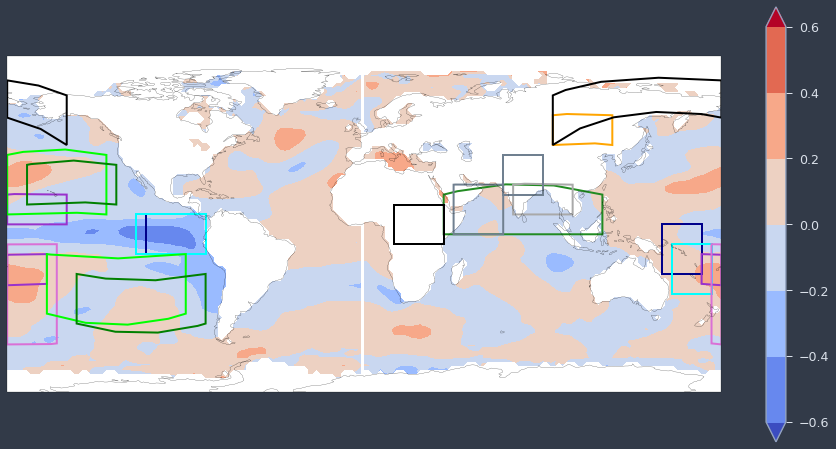

In [247]:
# run this cell last

from cartopy import config
import cartopy.crs as ccrs

from matplotlib import pyplot
import matplotlib.patches as mpatches

# contour plot with all boxes
ax = plt.axes(projection=ccrs.PlateCarree())
random = sst_anom.sel(time = (sst_anom['time.month']==5))
random_plot = correlation(random, precipa_jjas, dims='time')
random_plot.plot.contourf(cmap='coolwarm', extend='both')
ax.coastlines(color = 'black')

# EPT original boxes
ax.add_patch(mpatches.Rectangle(xy=[150,-20], width=20, height=25, facecolor=None, edgecolor='darkblue', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
#(20s-5n, 150-170e)
ax.add_patch(mpatches.Rectangle(xy=[-110,-10], width=30, height=20, facecolor=None, edgecolor='darkblue', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
#(10s-10n, 110-80w)

'''
# new EPT boxes
ax.add_patch(mpatches.Rectangle(xy=[-130,-10], width=50, height=20, facecolor=None, edgecolor='aqua', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
#(10s-10n, 130-80w)
ax.add_patch(mpatches.Rectangle(xy=[120,-10], width=35, height=30, facecolor=None, edgecolor='aqua', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
#(10s-20n, 120-155e)
'''

#new EPT boxes
ax.add_patch(mpatches.Rectangle(xy=[-115,-10], width=35, height=20, facecolor=None, edgecolor='aqua', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
#(10n-10s, 115-80w)
ax.add_patch(mpatches.Rectangle(xy=[155,-30], width=20, height=25, facecolor=None, edgecolor='aqua', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
#(5-30s, 155-175e)

# CPT original boxes
ax.add_patch(mpatches.Rectangle(xy=[170,-25], width=30, height=15, facecolor=None, edgecolor='darkorchid', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
#(25-10s, 170e-155w)
ax.add_patch(mpatches.Rectangle(xy=[-180,5], width=30, height=15, facecolor=None, edgecolor='darkorchid', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
#(5-20n, 180-150w)

# new CPT boxes
ax.add_patch(mpatches.Rectangle(xy=[175,-55], width=30, height=50, facecolor=None, edgecolor='orchid', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
#(55-5s, 175e-155w)

# PSH original boxes
ax.add_patch(mpatches.Rectangle(xy=[-160,-40], width=70, height=30, facecolor=None, edgecolor='lime', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
#(40-10s, 160-90w)
ax.add_patch(mpatches.Rectangle(xy=[-180,10], width=50, height=30, facecolor=None, edgecolor='lime', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
#(10-40n, 180-130w)

#PSH shifted
ax.add_patch(mpatches.Rectangle(xy=[-145,-45], width=65, height=25, facecolor=None, edgecolor='green', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
#(20-45s, 145-80w)
ax.add_patch(mpatches.Rectangle(xy=[-170,15], width=45, height=20, facecolor=None, edgecolor='green', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
#(15-35n, 170-125w)

# PSH india
ax.add_patch(mpatches.Rectangle(xy=[40,0], width=80, height=20, facecolor=None, edgecolor='forestgreen', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
#(0-20n, 40-120e)

# NAT
ax.add_patch(mpatches.Rectangle(xy=[95,45], width=30, height=15, facecolor=None, edgecolor='orange', fill = False, linewidth = 2, transform=ccrs.Geodetic()))

#MSE 1
ax.add_patch(mpatches.Rectangle(xy=[75,10], width=30, height=15, facecolor=None, edgecolor='darkgray', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
#(10-25n, 75-105e)

# MSE 2
ax.add_patch(mpatches.Rectangle(xy=[45,0], width=25, height=25, facecolor=None, edgecolor='slategray', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
#(0-25n, 45-70e)
ax.add_patch(mpatches.Rectangle(xy=[70,20], width=20, height=20, facecolor=None, edgecolor='slategray', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
#(20-40n, 70-90e)

#MSE Russia
ax.add_patch(mpatches.Rectangle(xy=[95,45], width=115, height=25, facecolor=None, edgecolor='black', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
#(45-70n, 95e-150w)

# MSE Africa
ax.add_patch(mpatches.Rectangle(xy=[15,-5], width=25, height=20, facecolor=None, edgecolor='black', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
#(5s-15n, 15-40e)

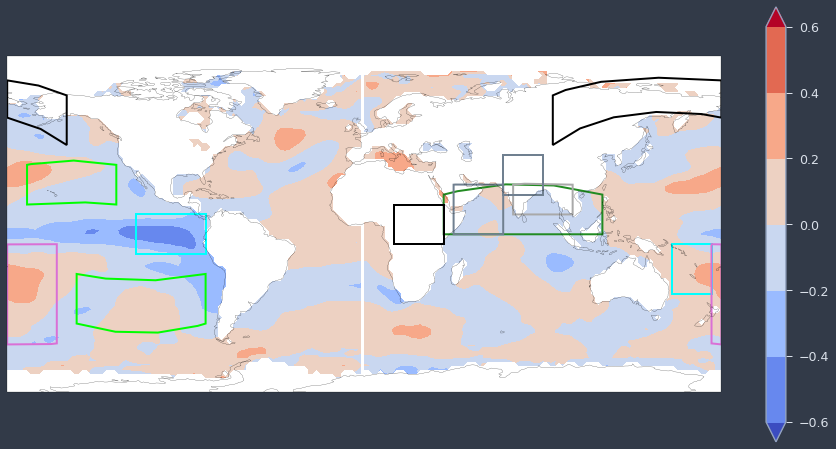

In [248]:
ax = plt.axes(projection=ccrs.PlateCarree())
random_plot.plot.contourf(cmap='coolwarm', extend='both')
ax.coastlines(color = 'black')

#new EPT boxes
ax.add_patch(mpatches.Rectangle(xy=[-115,-10], width=35, height=20, facecolor=None, edgecolor='aqua', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
#(10n-10s, 115-80w)
ax.add_patch(mpatches.Rectangle(xy=[155,-30], width=20, height=25, facecolor=None, edgecolor='aqua', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
#(5-30s, 155-175e)

# new CPT boxes
ax.add_patch(mpatches.Rectangle(xy=[175,-55], width=30, height=50, facecolor=None, edgecolor='orchid', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
#(55-5s, 175e-155w)

#PSH shifted new boxes
ax.add_patch(mpatches.Rectangle(xy=[-145,-45], width=65, height=25, facecolor=None, edgecolor='lime', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
#(20-45s, 145-80w)
ax.add_patch(mpatches.Rectangle(xy=[-170,15], width=45, height=20, facecolor=None, edgecolor='lime', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
#(15-35n, 170-125w)

# PSH india
ax.add_patch(mpatches.Rectangle(xy=[40,0], width=80, height=20, facecolor=None, edgecolor='forestgreen', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
#(0-20n, 40-120e)

#MSE 1
ax.add_patch(mpatches.Rectangle(xy=[75,10], width=30, height=15, facecolor=None, edgecolor='darkgray', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
#(10-25n, 75-105e)

# MSE 2
ax.add_patch(mpatches.Rectangle(xy=[45,0], width=25, height=25, facecolor=None, edgecolor='slategray', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
#(0-25n, 45-70e)
ax.add_patch(mpatches.Rectangle(xy=[70,20], width=20, height=20, facecolor=None, edgecolor='slategray', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
#(20-40n, 70-90e)

# MSE Russia
ax.add_patch(mpatches.Rectangle(xy=[95,45], width=115, height=25, facecolor=None, edgecolor='black', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
#(45-70n, 95e-150w)

# MSE Africa
ax.add_patch(mpatches.Rectangle(xy=[15,-5], width=25, height=20, facecolor=None, edgecolor='black', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
#(5s-15n, 15-40e)

In [47]:
# Copyright (c) 2020 Medha Palavalli.